In [32]:
import pandas as pd
import numpy as np
import scipy.stats

In [33]:
def load_dataset(dataset_file):    
    df = pd.read_csv(dataset_file, header=None)
    data = []
    for i in range(len(df)):
        data.append(list(df.iloc[i]))
    
    return data

In [34]:
print(len(dataset))
print(type(dataset))
print(dataset[0])
print("Loaded dataset file '{0}' contains '{1}' rows".format(dataset_file, len(dataset)))

768
<class 'list'>
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
Loaded dataset file 'pima-indians-diabetes.data.csv' contains '768' rows


In [35]:
def split_dataset(data, train_percentage):
    n_train_examples = int(len(data)*train_percentage/100)
    train_indexes = np.random.choice(range(len(data)), size=n_train_examples, replace=False)
    print("total train indexes : {0}".format(len(train_indexes)))
    print("total test indexes : {0}".format(len(data) - len(train_indexes)))
    train_set = []
    test_set = []
    for index in range(len(data)):
        if index in train_indexes:
            train_set.append(data[index])
        else:
            test_set.append(data[index])
            
    return train_set, test_set

In [36]:
def separate_by_class(data):
    separated_dict = {}
    for element in (data):
        if element[-1] not in separated_dict:
            separated_dict[element[-1]] = []
        separated_dict[element[-1]].append(element)
            
    return separated_dict

In [37]:
def get_mean(numbers):
    return np.mean(numbers)

def get_standard_deviation(numbers):
    return np.std(numbers)

In [38]:
"""
Summarize Dataset: For a given list of instances (for a class value) we can calculate the mean and 
the standard deviation for each attribute(column)
"""

def summarize(dataset):
	summaries = [(get_mean(attribute), get_standard_deviation(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]    #discard the values for last column(those are the labels i.e 0 and 1)
	return summaries

In [39]:
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for classValue in separated.keys():
        summaries[classValue] = summarize(separated[classValue])
    return summaries

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f" width=600/>

In [40]:
#calculate gaussian Probability Density Function using scipy
def calculate_pdf(value, mean, standard_deviation):
    return scipy.stats.norm(mean, standard_deviation).pdf(value)

In [41]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue in summaries.keys():
        probabilities[classValue] = 1
        #print("Total parameters for class value {} are {}".format(classValue, summaries[classValue]))
        for i in range(len(summaries[classValue])):
            mean, stdev = summaries[classValue][i]
            x = inputVector[i]
            probabilities[classValue] *= calculate_pdf(x, mean, stdev)
    return probabilities

In [42]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [43]:
def getPredictions(summaries, dataset):
    predictions = []
    for i in range(len(dataset)):
        result = predict(summaries, dataset[i])
        predictions.append(result)
    return predictions

In [44]:
def getAccuracy(dataset, predictions):
    correct = 0
    for x in range(len(dataset)):
        if dataset[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(dataset))) * 100.0

In [45]:
def main():
    filename = 'pima-indians-diabetes.data.csv'
    splitRatio = 80
    dataset = load_dataset(dataset_file)
    trainingSet, testSet = split_dataset(dataset, splitRatio)
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarize_by_class(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))
    
main()

total train indexes : 614
total test indexes : 154
Split 768 rows into train=614 and test=154 rows
Accuracy: 74.67532467532467%


####################################################
# scikit-learn implementation
####################################################

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import time

clf = GaussianNB()
t0 = time()

In [48]:
train_data , test_data = split_dataset(dataset, 80)

total train indexes : 614
total test indexes : 154


In [49]:
train_labels = []
test_labels = []
for i in range(len(train_data)):
    train_labels.append(train_data[i][-1])
    del train_data[i][-1]
    
for i in range(len(test_data)):    
    test_labels.append(test_data[i][-1])
    del test_data[i][-1]

In [50]:
clf.fit(train_data, train_labels)
print("training time:", round(time()-t0, 3), "s")

training time: 26.745 s


In [51]:
t0 = time()
pred = clf.predict(test_data)
print("prediction time:", round(time()-t0, 3), "s")

prediction time: 0.001 s


In [52]:
#print pred
accuracy = accuracy_score(test_labels, pred)

print("Accuracy Score is: " + str(accuracy))

Accuracy Score is: 0.7402597402597403


# Plotting the graph for the training

In [64]:
%matplotlib inline

In [65]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


Summarize Dataset: For a given list of instances (for a class value) we can calculate the mean and 
the standard deviation for each attribute(column)



In [66]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

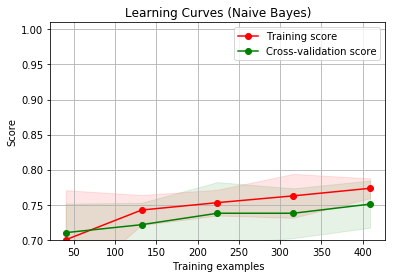

In [67]:
X, y = train_data, train_labels


title = "Learning Curves (Naive Bayes)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=None, n_jobs=4)

plt.show()